In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.linalg import lstsq, inv, pinv
from sklearn.linear_model import Ridge

In [2]:
num_datapoints = 1000
std = 1.0
weights_std = 10.0
noise_std = 2.0
X = np.random.normal(0,std, (num_datapoints,1))
X = np.hstack([np.ones(X.shape), X, X**2, X**3])
ground_truth_weights = np.random.normal(0, weights_std, (X.shape[1], 1))
noise = np.random.normal(0, noise_std, (num_datapoints, 1))

y = X @ ground_truth_weights + noise

In [3]:
def run_experiment(X, y, sparsity_percentage = 0.9, num_hidden = 100, weight_variances = 1, train_percentage = 0.7, doHebbian = False):
    j = np.random.normal(0, weight_variances, (X.shape[1], num_hidden))
    j_mask = np.random.rand(X.shape[1], num_hidden) > sparsity_percentage
    j_mask = j_mask.astype(np.float32)
    j = j * j_mask
    h = np.heaviside(X @ j, 0)
    X_train = X[:int(train_percentage * X.shape[0])]
    h_train = h[:int(train_percentage * h.shape[0])]
    y_train = y[:int(train_percentage * y.shape[0])]
    X_test = X[int(train_percentage * X.shape[0]):]
    h_test = h[int(train_percentage * h.shape[0]):]
    y_test = y[int(train_percentage * y.shape[0]):]
    
#     if doHebbian:# Hebbian learning 
#         h_train = h_train - np.mean(h_train, axis=1)[:, np.newaxis]
#         h_test = h_test - np.mean(h_test, axis=1)[:, np.newaxis] # use mean-subtracted activations for testing too
#         W = h_train.T @ y_train

    W = pinv(h_train.T @ h_train) @ h_train.T @ y_train

#     else: # pseudoinverse
#         alpha = 0.1
#         clf = Ridge(alpha=alpha, fit_intercept=False)
#         clf.fit(h_train.T, y_train.T)
#         W = clf.coef_.T
        
    ypred_test = h_test @ W #reading out from  expansion layer 

    #compute error rate (Fraction incorrect)
    #err = (1 / y_test.shape[0]) * np.sum(1 - (ypred_test == y_test).astype(int))
    err = (1 / y_test.shape[0]) * np.mean((ypred_test - y_test)**2)
    
    return err

In [ ]:
num_repeat = 300
h_sizes = np.logspace(0, 3, 10).astype(int)
errors = np.zeros((len(h_sizes), num_repeat))

for i in range(len(h_sizes)):
    print('h size = ', h_sizes[i])
    for j in range(num_repeat):  
        
        errors[i, j] = run_experiment(X, y, num_hidden = h_sizes[i])

h size =  1
h size =  2
h size =  4
h size =  10
h size =  21
h size =  46
h size =  100
h size =  215
h size =  464


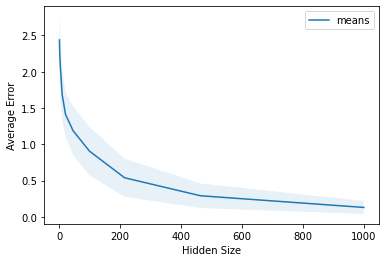

In [5]:
h_means = np.mean(errors, axis = 1)
h_std = np.std(errors, axis = 1)
plt.plot(h_sizes, h_means, label = 'means')
plt.ylabel('Average Error')
plt.xlabel('Hidden Size')
plt.fill_between(h_sizes, h_means - h_std, h_means + h_std, alpha = 0.1)
plt.legend()

In [6]:
num_repeat = 3
sparsity_percentages = [0.2,0.4,0.6,0.8]
errors = np.zeros((len(sparsity_percentages), num_repeat))

for i in range(len(sparsity_percentages)): 
    for j in range(num_repeat):  
        errors[i, j] = run_experiment(X, y, sparsity_percentage = sparsity_percentages[i])

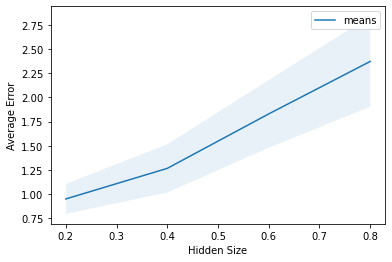

In [15]:
s_means = np.mean(errors, axis = 1)
s_std = np.std(errors, axis = 1)
plt.plot(sparsity_percentages, s_means, label = 'means')
plt.ylabel('Average Error')
plt.xlabel('Hidden Size')
plt.fill_between(sparsity_percentages, s_means - s_std, s_means + s_std, alpha = 0.1)
plt.legend()